In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [290]:
patients_df = pd.read_csv("patients.csv")
treatments_df = pd.read_csv("treatments.csv")
treatments_other = pd.read_csv('treatments_cut.csv')
adverse_reactions_df = pd.read_csv("adverse_reactions.csv")

In [291]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [292]:
patients_df.duplicated().value_counts()

False    503
dtype: int64

In [293]:
patients_df.height.sort_values()

4      27
423    59
335    59
290    59
132    59
268    59
400    59
232    59
171    59
355    59
181    59
454    59
203    60
175    60
82     60
57     60
227    60
143    60
191    60
272    60
367    60
255    60
443    60
157    60
17     60
241    60
294    60
346    60
7      60
62     60
       ..
201    73
349    73
406    73
247    73
158    73
98     74
242    74
395    74
384    74
368    74
111    74
315    74
486    74
413    74
261    74
291    74
450    74
453    74
485    74
138    74
364    75
160    75
391    75
284    75
83     76
88     76
121    76
487    77
238    78
418    79
Name: height, Length: 503, dtype: int64

In [294]:
patients_df.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
51     107.1
270    108.1
198    108.5
48     109.1
478    109.6
141    110.2
38     111.8
438    112.0
14     112.0
235    112.2
307    112.4
191    112.6
408    113.1
49     113.3
326    114.0
338    114.1
253    117.0
321    118.4
168    118.8
1      118.8
350    119.0
207    119.2
265    120.0
341    120.3
       ...  
332    224.0
252    224.2
12     224.2
222    224.8
166    225.3
111    225.9
101    226.2
150    226.6
352    227.7
428    227.7
88     227.7
13     228.4
339    229.0
182    230.3
121    230.8
257    231.7
395    231.9
246    232.1
219    237.8
11     238.7
50     238.9
441    239.1
499    239.6
439    242.0
487    242.4
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

In [295]:
patients_df.bmi.sort_values()

48     17.1
38     17.5
438    17.5
265    17.7
408    17.7
338    17.9
321    18.0
397    18.2
208    18.4
278    18.4
168    18.6
14     18.6
307    18.7
341    18.8
158    18.8
317    18.8
51     19.0
210    19.1
31     19.1
1      19.2
458    19.3
459    19.3
97     19.3
502    19.3
306    19.4
478    19.4
49     19.4
213    19.4
362    19.5
74     19.5
       ... 
13     35.8
339    35.9
23     36.0
157    36.0
125    36.0
177    36.1
61     36.2
130    36.2
113    36.2
10     36.4
35     36.4
403    36.5
236    36.5
255    36.5
482    36.6
479    36.6
104    36.7
279    36.7
376    36.7
227    36.7
355    36.9
52     36.9
443    37.3
367    37.3
283    37.3
246    37.5
42     37.6
203    37.6
245    37.7
431    37.7
Name: bmi, Length: 503, dtype: float64

In [296]:
patients_df.birthdate.value_counts().sort_values()

9/27/1974     1
12/2/1982     1
6/18/1934     1
2/19/1939     1
9/29/1966     1
6/19/1922     1
1/20/1946     1
6/20/1997     1
6/27/1948     1
5/16/1936     1
3/21/1976     1
7/7/1924      1
1/25/1944     1
8/20/1948     1
3/1/1931      1
1/1/1942      1
5/28/1993     1
5/23/1940     1
4/30/1925     1
11/15/1980    1
9/14/1938     1
6/14/1940     1
4/29/1952     1
5/3/1950      1
2/13/1997     1
6/7/1965      1
8/14/1987     1
9/16/1998     1
11/21/1994    1
11/26/1931    1
             ..
10/11/1963    1
11/4/1962     1
7/26/1951     1
11/25/1962    1
3/3/1945      1
8/7/1941      1
12/16/1962    1
8/13/1936     1
12/10/1928    1
6/30/1928     1
8/7/1938      1
5/15/1968     1
3/8/1943      1
7/14/1959     1
10/28/1973    1
11/6/1921     1
8/14/1950     1
11/10/1977    1
5/16/1931     1
4/7/1943      1
3/29/1928     1
12/7/1928     1
1/30/1997     1
1/23/1950     1
3/25/1938     2
4/10/1959     2
5/3/1954      2
10/23/1960    2
8/1/1985      2
1/1/1975      6
Name: birthdate, Length:

In [297]:
patients_df.contact.value_counts()

johndoe@email.com1234567890                            6
JakobCJakobsen@einrot.com+1 (845) 858-7707             2
PatrickGersten@rhyta.com402-848-4923                   2
304-438-2648SandraCTaylor@dayrep.com                   2
201-739-3931KaodilinakachukwuNnonso@gustr.com          1
HaylomNebay@gustr.com1 219 391 7729                    1
978-243-8596JuanPerez@teleworm.us                      1
TeklaWalczak@einrot.com570-698-4203                    1
Abdul-NurMummarIsa@rhyta.com1 931 207 0839             1
678-350-2390ThachThiKieuChau@superrito.com             1
SophieCabreraIbarra@teleworm.us1 718 795 9124          1
706-616-0152BenignaFerrari@einrot.com                  1
281-556-4376WuSung@gustr.com                           1
585-889-5156PipalukPetrussen@rhyta.com                 1
VascovandeWiel@rhyta.com+1 (843) 368-5129              1
TicoKoffeman@armyspy.com+1 (407) 838-0201              1
580-622-5674RovzanKishiev@armyspy.com                  1
HiromuHorikawa@superrito.com1 5

In [298]:
patients_df.country.value_counts()

United States    491
Name: country, dtype: int64

In [299]:
patients_df.zip_code.value_counts()

12345.0    6
10004.0    4
30303.0    4
11590.0    3
10011.0    3
90017.0    3
1730.0     3
70112.0    3
60148.0    3
35203.0    3
11530.0    3
15205.0    3
98109.0    3
92103.0    2
2110.0     2
92101.0    2
60631.0    2
19108.0    2
13221.0    2
23602.0    2
33323.0    2
95134.0    2
39501.0    2
12207.0    2
94108.0    2
2081.0     2
34471.0    2
7087.0     2
97205.0    2
25962.0    2
          ..
95453.0    1
53204.0    1
55410.0    1
73086.0    1
48342.0    1
59324.0    1
92111.0    1
19020.0    1
22958.0    1
46312.0    1
13904.0    1
2210.0     1
2780.0     1
75601.0    1
73844.0    1
64105.0    1
36104.0    1
64110.0    1
35806.0    1
83702.0    1
27893.0    1
10036.0    1
79506.0    1
39362.0    1
94070.0    1
94549.0    1
19034.0    1
11743.0    1
38310.0    1
1752.0     1
Name: zip_code, Length: 430, dtype: int64

In [300]:
patients_df.state.value_counts()

California    36
TX            32
New York      25
CA            24
NY            22
MA            22
PA            18
GA            15
OH            14
Illinois      14
LA            13
MI            13
Florida       13
OK            13
NJ            12
VA            11
WI            10
MS            10
IL            10
AL             9
IN             9
MN             9
TN             9
FL             9
WA             8
NC             8
KY             8
MO             7
KS             6
ID             6
NV             6
IA             5
CT             5
SC             5
ND             4
ME             4
AR             4
CO             4
Nebraska       4
RI             4
AZ             4
WV             3
OR             3
SD             3
MD             3
DE             3
MT             2
NE             2
VT             2
DC             2
WY             1
AK             1
NH             1
NM             1
Name: state, dtype: int64

In [301]:
patients_df.city.value_counts()

New York           18
San Diego           8
Tulsa               7
Houston             6
Chicago             6
Atlanta             6
Los Angeles         5
Philadelphia        5
Pittsburgh          5
Sacramento          4
San Antonio         4
New Orleans         4
Portland            4
Providence          4
Burbank             3
Albany              3
Westbury            3
Garden City         3
Lombard             3
Manhattan           3
San Jose            3
Newport News        3
Boston              3
Oklahoma City       3
Seattle             3
Washington          3
Birmingham          3
Tampa               3
Bedford             3
Hartford            3
                   ..
San Carlos          1
Danube              1
Mansfield           1
Marshalltown        1
Utica               1
Woodbridge          1
Custer              1
Des Moines          1
Bovill              1
Columbus            1
Ormond Beach        1
Aurora              1
Palo Alto           1
Redmond             1
Wilson    

In [302]:
patients_df.address.value_counts()

123 Main Street               6
2778 North Avenue             2
648 Old Dear Lane             2
2476 Fulton Street            2
2636 Benson Park Drive        1
272 Boone Crockett Lane       1
3161 Fantages Way             1
4476 Center Street            1
944 Thrash Trail              1
3548 Hilltop Drive            1
2621 Koontz Lane              1
2316 Ingram Road              1
153 Fieldcrest Road           1
2704 Windy Ridge Road         1
3464 Big Indian               1
1497 Hidden Meadow Drive      1
631 Isaacs Creek Road         1
1886 Bicetown Road            1
1049 Park Boulevard           1
1810 Hardesty Street          1
1536 John Daniel Drive        1
2055 Emeral Dreams Drive      1
1027 Tenmile Road             1
2146 Willow Greene Drive      1
4273 Deans Lane               1
1333 Comfort Court            1
2931 Romano Street            1
192 Patton Lane               1
2458 Broadway Avenue          1
3209 Crowfield Road           1
                             ..
3391 Mar

In [303]:
patients_df.surname.value_counts()

Doe            6
Taylor         3
Jakobsen       3
Correia        2
Bùi            2
Schiavone      2
Tucker         2
Ogochukwu      2
Liễu           2
Kowalczyk      2
Lund           2
Grímsdóttir    2
Collins        2
Cabrera        2
Berg           2
Tạ             2
Lương          2
Parker         2
Silva          2
Nilsen         2
Dratchev       2
Woźniak        2
Batukayev      2
Cindrić        2
Johnson        2
Aranda         2
Hueber         2
Souza          2
Lâm            2
Kadyrov        2
              ..
Marchesi       1
Radislav       1
Vestergaard    1
Rahal          1
Ziegler        1
Leppäluoto     1
Zhdanov        1
Fiorentino     1
Selassie       1
Pecha          1
Luoma          1
Arsanukayev    1
Wiśniewska     1
Miranda        1
Morita         1
Murakami       1
Heilmann       1
Fodor          1
Tomaszewski    1
Afanasyeva     1
Endrizzi       1
Cotton         1
Ehrlichmann    1
Efrem          1
Johnsrud       1
Wellish        1
Chinedum       1
Ekechukwu     

In [304]:
patients_df.given_name.value_counts()

John          9
Robert        3
Søren         3
Yasmin        2
Michael       2
Muhammad      2
Sofia         2
Fatimah       2
Xiuxiu        2
Stephen       2
Rebecca       2
Alexander     2
Anja          2
Elisabeth     2
Mustafa       2
Joseph        2
Sargent       2
Abel          2
Julia         2
Sara          2
David         2
Leo           2
Caroline      2
Sandy         2
Hanna-Mari    1
Taylah        1
Bernd         1
Chaja         1
Benjamin      1
Cecilie       1
             ..
Poldi         1
Yunadi        1
Gabriele      1
Haruna        1
Jose          1
Hường         1
Pamela        1
Asia          1
Gina          1
Guðni         1
Makda         1
Naja          1
Noriyuki      1
Manouck       1
Melisa        1
Hui           1
Steven        1
Adib          1
Nicoline      1
Jane          1
Kamila        1
Samuel        1
Châu          1
Ananías       1
Jae           1
Minea         1
Chibuzo       1
Jinke         1
Chỉ           1
Bouke         1
Name: given_name, Length

In [305]:
patients_df.assigned_sex.value_counts()

male      253
female    250
Name: assigned_sex, dtype: int64

In [306]:
#there should be no duplicated Ids
patients_df.patient_id.duplicated().value_counts()

False    503
Name: patient_id, dtype: int64

In [307]:
patients_df.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [308]:
patients_df

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,386-334-5237RafaelCardosoCosta@gustr.com,8/31/1931,183.9,70,26.4
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728.0,United States,775-533-5933MaryBAdams@einrot.com,11/19/1969,146.3,65,24.3
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037.0,United States,XiuxiuChang@einrot.com1 408 778 3236,8/13/1958,158.0,60,30.9
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105.0,United States,816-265-9578DavidGustafsson@armyspy.com,3/6/1937,163.9,66,26.5
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4


In [309]:
#check if treatment_df and treatment_other are the same
# they appear to have all the same column names so let's join them now to prevent having to do work on both files seperately
print(treatments_other.head())
treatments_df.head()

  given_name    surname    auralin    novodra  hba1c_start  hba1c_end  \
0      jožka  resanovič  22u - 30u          -         7.56       7.22   
1  inunnguaq   heilmann  57u - 67u          -         7.85       7.45   
2      alwin   svensson  36u - 39u          -         7.78       7.34   
3        thể      lương          -  61u - 64u         7.64       7.22   
4     amanda    ribeiro  36u - 44u          -         7.85       7.47   

   hba1c_change  
0          0.34  
1           NaN  
2           NaN  
3          0.92  
4          0.38  


,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [310]:
#will automatically raise error if conflict of index or duplication
treatments_combined = treatments_other.append(treatments_df, ignore_index=True, verify_integrity=True)

#check if there are duplicates before reassiging
print(treatments_df.duplicated().value_counts())
print(treatments_combined.duplicated().value_counts())

False    279
True       1
dtype: int64
False    349
True       1
dtype: int64


In [311]:
treatments_df = treatments_combined

In [312]:
#we saw there was one duplicate in the original treatment file. let's find it.
treatments_df[treatments_df.duplicated()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
206,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [353]:
#looks like hba1c has quite a few value missing, strange considering there are start and end values for all
treatments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
given_name                 350 non-null object
surname                    350 non-null object
auralin                    350 non-null object
novodra                    350 non-null object
hba1c_start                350 non-null float64
hba1c_end                  350 non-null float64
hba1c_change               213 non-null float64
hba1c_change_calculated    350 non-null float64
dtypes: float64(4), object(4)
memory usage: 22.0+ KB


In [314]:
treatments_df.given_name.value_counts()

david         3
joseph        3
alexander     2
robert        2
sofia         2
mustafa       2
yasmin        2
rebecca       2
anja          2
søren         2
eugene        1
mahmud        1
sousuke       1
aaliyah       1
león          1
burrell       1
alvin         1
triana.       1
willem-jan    1
mackenzie     1
flavia        1
csaba         1
blanka        1
cumelén       1
sabr          1
jan           1
coralie       1
nilton        1
tegan         1
satsita       1
             ..
emy           1
marcel        1
niels         1
sauli         1
leah          1
tekla         1
annika        1
vasco         1
manuela       1
javier        1
khalid        1
mette         1
leon          1
daud          1
avdei         1
rovzan        1
yumena        1
hanka         1
eddie         1
cintia        1
suoma         1
jose          1
jane          1
leixandre     1
nora          1
mathilde      1
camilla       1
hiromu        1
rut           1
harley        1
Name: given_name, Length

In [315]:
treatments_df.surname.value_counts()

aranda           2
tucker           2
woźniak          2
johnson          2
lương            2
lâm              2
bùi              2
batukayev        2
berg             2
nilsen           2
jakobsen         2
cindrić          2
dratchev         2
ogochukwu        2
schiavone        2
day              2
hueber           2
sjöberg          1
vesecká          1
guðbrandsson     1
casárez          1
miller           1
tomaszewski      1
adamski          1
mehari           1
fakhoury         1
kishiev          1
mueller          1
heimisson        1
tạ               1
                ..
østergaard       1
hsueh            1
mai              1
komavec          1
bjarkason        1
sauvé            1
johnsrud         1
kowalczyk        1
dandonneau       1
gustafsson       1
hrafnsdóttir     1
grímsdóttir      1
nyborg           1
martinsen        1
wiśniewski       1
archer           1
nebay            1
zaitseva         1
sultygov         1
villalpando      1
hermansen        1
hopkins     

In [352]:
#note: null values are denoted as "-"
treatments_df.auralin.value_counts()

-            175
31u - 38u      3
29u - 37u      3
30u - 38u      3
36u - 44u      3
36u - 46u      2
39u - 46u      2
34u - 42u      2
41u - 50u      2
33u - 39u      2
22u - 30u      2
36u - 39u      2
39u - 50u      2
25u - 35u      2
48u - 56u      2
36u - 42u      2
44u - 54u      2
37u - 46u      2
27u - 37u      2
55u - 68u      2
37u - 43u      2
51u - 59u      2
29u - 36u      2
32u - 42u      2
42u - 50u      2
24u - 32u      2
44u - 55u      2
42u - 49u      2
38u - 45u      2
40u - 49u      2
            ... 
58u - 63u      1
57u - 64u      1
35u - 45u      1
47u - 50u      1
42u - 48u      1
31u - 37u      1
51u - 60u      1
39u - 47u      1
32u - 37u      1
48u - 54u      1
27u - 36u      1
63u - 74u      1
49u - 55u      1
45u - 51u      1
33u - 41u      1
26u - 36u      1
42u - 53u      1
40u - 47u      1
44u - 53u      1
48u - 59u      1
42u - 51u      1
33u - 36u      1
39u - 52u      1
53u - 57u      1
61u - 67u      1
35u - 38u      1
42u - 56u      1
25u - 32u     

In [317]:
treatments_df.novodra.value_counts()

-            175
41u - 39u      4
39u - 36u      4
40u - 39u      3
42u - 41u      3
42u - 44u      3
30u - 32u      3
42u - 42u      3
44u - 43u      3
26u - 23u      3
49u - 46u      3
26u - 25u      2
37u - 35u      2
34u - 34u      2
36u - 32u      2
43u - 42u      2
41u - 38u      2
27u - 29u      2
54u - 54u      2
35u - 29u      2
51u - 54u      2
36u - 37u      2
43u - 40u      2
36u - 38u      2
47u - 48u      2
32u - 31u      2
31u - 31u      2
28u - 24u      2
22u - 23u      2
40u - 36u      2
            ... 
51u - 47u      1
31u - 30u      1
41u - 36u      1
31u - 36u      1
33u - 33u      1
31u - 32u      1
28u - 26u      1
39u - 37u      1
38u - 38u      1
37u - 30u      1
54u - 50u      1
56u - 58u      1
44u - 45u      1
37u - 40u      1
19u - 27u      1
29u - 30u      1
47u - 46u      1
35u - 34u      1
38u - 39u      1
38u - 32u      1
48u - 53u      1
56u - 57u      1
52u - 52u      1
54u - 51u      1
36u - 36u      1
30u - 29u      1
59u - 56u      1
23u - 21u     

In [318]:
#the clustering around 7.97 concerned me at first, but after some research it looks like HbA1c rarely goes above 7 so it makes sense that the distribution would be skewed toward it. Still it's odd that there are so many right below 8 so I'll note it below.
treatments_df.hba1c_start.value_counts()

7.97    10
7.66     9
7.58     9
7.98     8
7.85     8
7.72     8
7.71     8
7.77     8
7.78     8
7.64     8
7.59     8
7.79     7
7.87     7
7.88     7
7.53     7
7.70     7
7.93     6
7.67     6
7.75     6
7.73     6
7.86     6
7.89     6
7.56     6
7.60     6
7.92     6
7.90     6
7.68     6
7.55     6
7.76     6
7.74     5
        ..
9.54     1
9.64     1
9.82     1
8.51     1
9.13     1
8.09     1
9.71     1
8.02     1
9.41     1
9.65     1
9.35     1
9.12     1
9.63     1
8.29     1
9.56     1
8.08     1
9.87     1
8.61     1
9.45     1
9.95     1
9.04     1
9.81     1
9.62     1
9.09     1
9.48     1
8.19     1
8.56     1
8.82     1
9.27     1
9.11     1
Name: hba1c_start, Length: 101, dtype: int64

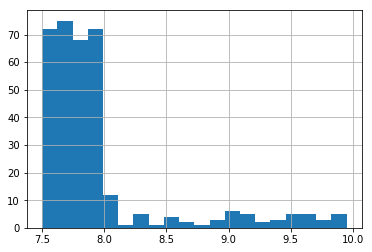

In [319]:
treatments_df.hba1c_start.hist(bins=20)
plt.show()

In [320]:
#in other words everyone in the study has diabetes
treatments_df.hba1c_start.sort_values()

340    7.50
183    7.50
196    7.50
23     7.51
58     7.51
123    7.51
175    7.51
19     7.51
124    7.52
154    7.52
109    7.52
47     7.53
112    7.53
111    7.53
254    7.53
6      7.53
86     7.53
276    7.53
63     7.54
22     7.54
174    7.54
40     7.54
226    7.54
193    7.55
219    7.55
233    7.55
297    7.55
54     7.55
113    7.55
259    7.56
       ... 
347    9.04
101    9.09
289    9.11
139    9.12
261    9.13
121    9.18
64     9.21
221    9.25
322    9.27
137    9.35
42     9.41
265    9.45
229    9.47
318    9.48
302    9.53
82     9.54
195    9.56
321    9.62
283    9.63
301    9.64
303    9.65
94     9.68
262    9.71
194    9.81
95     9.82
241    9.84
151    9.84
145    9.87
39     9.91
236    9.95
Name: hba1c_start, Length: 350, dtype: float64

In [321]:
treatments_df.hba1c_end.value_counts()

7.34    12
7.30    11
7.40    11
7.51     9
7.29     8
7.17     8
7.49     8
7.42     7
7.39     7
7.36     7
7.56     7
7.47     7
7.55     7
7.27     7
7.18     6
7.57     6
7.53     6
7.28     6
7.50     6
7.46     6
7.32     6
7.16     6
7.48     6
7.52     5
7.12     5
7.26     5
7.15     5
7.20     5
7.59     5
7.31     5
        ..
7.90     1
9.10     1
9.30     1
9.40     1
7.01     1
9.05     1
7.73     1
7.94     1
9.21     1
7.02     1
8.62     1
9.06     1
7.54     1
7.67     1
9.48     1
7.05     1
9.52     1
8.10     1
8.56     1
8.08     1
8.63     1
9.27     1
8.27     1
9.31     1
8.89     1
8.39     1
7.83     1
8.79     1
7.10     1
7.92     1
Name: hba1c_end, Length: 113, dtype: int64

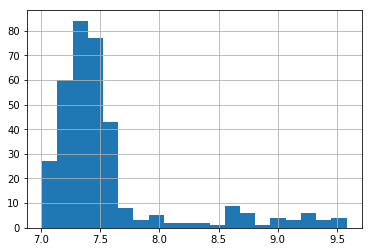

In [322]:
#looks like roughly the same pattern but lower. This time clustering around 7.5.
# seems to be the center of normal distribution rather than noise
treatments_df.hba1c_end.hist(bins=20)
plt.show()

In [323]:
#remember there are NaN values to account for
treatments_df.hba1c_change.value_counts()

0.39    23
0.35    16
0.34    16
0.37    14
0.33    13
0.38    13
0.36    12
0.97    11
0.92    11
0.93     9
0.30     8
0.90     7
0.95     7
0.91     7
0.96     6
0.32     6
0.31     6
0.94     4
0.29     4
0.99     3
0.51     3
0.98     3
0.27     3
0.28     2
0.54     1
0.53     1
0.26     1
0.20     1
0.24     1
0.50     1
Name: hba1c_change, dtype: int64

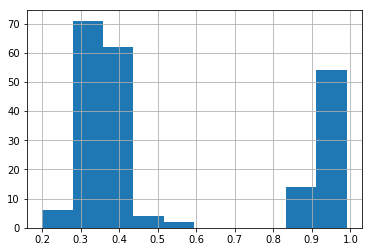

In [324]:
#Appears bimodal, which is interesting - might have effects on later analysis (e.g. regression)
#the high incidence of 0.3 - 0.4 values above appears to be the center of a normal distribution rather than noise.
treatments_df.hba1c_change.hist()
plt.show()

In [325]:
treatments_df.describe()

,hba1c_start,hba1c_end,hba1c_change
count,350.000000,350.000000,213.000000
mean,7.956343,7.560057,0.540657
std,0.545328,0.545456,0.277417
min,7.500000,7.010000,0.200000
25%,7.650000,7.270000,0.340000
50%,7.785000,7.400000,0.380000
75%,7.950000,7.557500,0.920000
max,9.950000,9.580000,0.990000


In [326]:
#looks like the hba1c_change doesn't match the start and end value, especially for high values. This might explain the bi-modality in the data.
#let's generate the column directly from the start and end values and redo the above analysis
treatments_df

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38
5,meya,sjöberg,-,42u - 42u,7.77,7.42,0.35
6,sara,miles,30u - 35u,-,7.53,7.12,NaN
7,frydryk,adamski,63u - 74u,-,7.75,7.27,NaN
8,jane,citizen,-,37u - 38u,7.98,7.60,NaN
9,angela,lavrentyev,-,28u - 24u,7.61,7.14,0.97


In [327]:
treatments_df["hba1c_change_calculated"] = treatments_df.hba1c_start - treatments_df.hba1c_end

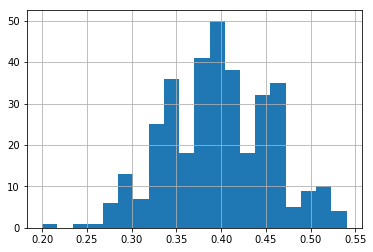

In [328]:
#sure enough the larger values were miss calculated
treatments_df.hba1c_change_calculated.hist(bins=20)
plt.show()

In [329]:
#looks like re-calculating the change also filled in it's missing values
print(treatments_df.info())
treatments_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
given_name                 350 non-null object
surname                    350 non-null object
auralin                    350 non-null object
novodra                    350 non-null object
hba1c_start                350 non-null float64
hba1c_end                  350 non-null float64
hba1c_change               213 non-null float64
hba1c_change_calculated    350 non-null float64
dtypes: float64(4), object(4)
memory usage: 22.0+ KB
None


,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change,hba1c_change_calculated
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN,0.40
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN,0.44
3,thể,lương,-,61u - 64u,7.64,7.22,0.92,0.42
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38,0.38
5,meya,sjöberg,-,42u - 42u,7.77,7.42,0.35,0.35
6,sara,miles,30u - 35u,-,7.53,7.12,NaN,0.41
7,frydryk,adamski,63u - 74u,-,7.75,7.27,NaN,0.48
8,jane,citizen,-,37u - 38u,7.98,7.60,NaN,0.38
9,angela,lavrentyev,-,28u - 24u,7.61,7.14,0.97,0.47


In [330]:
# looks like no patient_id, but has given_name and surname
# small number of adverse reactions 
# no null values
adverse_reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes


In [331]:
adverse_reactions_df.duplicated().value_counts()

False    34
dtype: int64

In [332]:
adverse_reactions_df.given_name.value_counts()

flavia         1
lixue          1
leon           1
miłosław       1
xiuxiu         1
ole            1
clinton        1
jia li         1
manouck        1
berta          1
kang           1
jakob          1
joseph         1
steven         1
monika         1
jasmine        1
abdul-nur      1
tegan          1
anenechi       1
sofia          1
christopher    1
gabriele       1
alex           1
krisztina      1
cecilie        1
lena           1
albinca        1
noe            1
finley         1
idalia         1
merci          1
louise         1
abel           1
elliot         1
Name: given_name, dtype: int64

In [333]:
adverse_reactions_df.surname.value_counts()

johnson       2
isa           1
wiśniewski    1
chandler      1
hsueh         1
chidi         1
napolitani    1
miller        1
aranda        1
chang         1
komavec       1
teng          1
leroux        1
mai           1
wubbels       1
woodward      1
baer          1
yonatan       1
scholz        1
moore         1
fiorentino    1
richardson    1
saenger       1
magyar        1
crawford      1
jakobsen      1
petersen      1
hermansen     1
nilsen        1
day           1
roy           1
sykes         1
lončar        1
Name: surname, dtype: int64

In [334]:
#given that this is a trial for diabetics it is hypoglycemia is an interesting side effect - something to note in an exploratory analysis later.
adverse_reactions_df.adverse_reaction.value_counts()

hypoglycemia                 19
injection site discomfort     6
headache                      3
throat irritation             2
nausea                        2
cough                         2
Name: adverse_reaction, dtype: int64

In [335]:
adverse_reactions_df

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


## Assess

### Quality
#### Patients Data
- [ ] Wrong types
    - zipcode should be str
    - should patient_id be str?
- [ ] Null values for address, city, state, zip_code
- [x] Patient 4 has height of 27 inches (too low? check if realistic)
- [x] Patient 210 has weight of 48.8 (too low? check if realistic)
- [ ] 6 entries of birthday = 1/1/1975 (too high? Especially given the 1/1)
    - is there a cause in the way the input was designed?
- [ ] Phone and Email are merged in `contact`
- [ ] 6 occurences of contact johndoe@email.com1234567890
- [ ] 6 occurence of zip_code 12345.0 
    - same as johndoe entries?
- [ ] 6 occurences of address 123 Main Street
- [ ] 6 occurrences of surname Doe
- [ ] 6 occurreneces of `given_name` John
- [ ] Some `state` are abbreviations others are full name
- [ ] 3 Occurrences of `surname` Jackobsen and Taylor




  

#### Treatments Data

- [x] there are mutiple treatment files
- [x] `auralin` and `novodra` column names could be more descriptive (add "\_dose"?)
- [x] `hba1c_change` has >100 null values 
- [x] replace erroneous `hba1c_change` with the `hba1c_change_calculated`
- [x] has duplicate patient joseph day
- [x] `auralin` and `novodra` have null values denoted by "-"
    - [x] would be nice to have this be a number to test for dose dependence
    - are doses determined by weight or are their different dose groups not annotated?
- [x] `hbalc_change` has erroneous values
- [ ] no patient id in the table - would be better than names for anonymity and resilience
- [ ] there are only 208 entries with data vs. 503 contacts - why? control group?
- [ ] Check for control group size with people who have doses of neither auralin nor novodra

Notes: 
- John Doe names not included
- Seems to be a threshold effect for `hab1c_start` at 7.97


#### Adverse Reactions Data
- [ ] uses name as foreign key instead of patient ID

Note:
- would be nice to compare adverse reactions with dosages in a later EDA
   - tempting to consolidate this with the treatment data

## Cleaning

All in all this data is fairly clean. I'd like to be able to tell if the drugs worked so I'll focus on cleaning the treatments data. Patient data shouldn't effect this analysis so I won't do much with it, except for a few things that would screw up someone else's analysis if they picked this data up (like outliers). Taking from the above:

In [336]:
#copy to prevent direct mutation
patients_clean = patients_df.copy()
treatments_clean = treatments_df.copy()
adverse_reactions_clean = adverse_reactions_df.copy()

## `patients` - Patient 4 has height of 27 inches 

In [337]:
#looking at the data, I'm guess 27 might be 72?
patients_clean.iloc[4,:]

patient_id                                    5
assigned_sex                               male
given_name                                  Tim
surname                                 Neudorf
address                    1428 Turkey Pen Lane
city                                     Dothan
state                                        AL
zip_code                                  36303
country                           United States
contact         334-515-7487TimNeudorf@cuvox.de
birthdate                             2/18/1928
weight                                    192.3
height                                       27
bmi                                        26.1
Name: 4, dtype: object

In [338]:
#looks like that's the case. Let's change it below.
tim_n = patients_clean.iloc[4,:]
test_bmi = tim_n.weight / (72 ** 2) * 703
print(tim_n.bmi)
print(test_bmi)

26.1
26.0777199074


In [339]:
patients_clean.loc[4,"height"] = 72

In [340]:
#confirm the change
patients_clean.iloc[4,:]

patient_id                                    5
assigned_sex                               male
given_name                                  Tim
surname                                 Neudorf
address                    1428 Turkey Pen Lane
city                                     Dothan
state                                        AL
zip_code                                  36303
country                           United States
contact         334-515-7487TimNeudorf@cuvox.de
birthdate                             2/18/1928
weight                                    192.3
height                                       72
bmi                                        26.1
Name: 4, dtype: object

## `patients` - Patient 210 has weight of 48.8 

In [341]:
#I'm guessing weight is in kilograms instead of pounds
patients_clean.loc[210,:]

patient_id                                            211
assigned_sex                                       female
given_name                                        Camilla
surname                                          Zaitseva
address                               4689 Briarhill Lane
city                                              Wooster
state                                                  OH
zip_code                                            44691
country                                     United States
contact         330-202-2145CamillaZaitseva@superrito.com
birthdate                                      11/26/1938
weight                                               48.8
height                                                 63
bmi                                                  19.1
Name: 210, dtype: object

In [342]:
#looks right
camilla_z = patients_clean.loc[210,:]
weight_lbs = camilla_z.weight * 2.20462
test_bmi = weight_lbs / (camilla_z.height ** 2) * 703
print(camilla_z.bmi)
print(test_bmi)

19.1
19.0558265477


In [343]:
patients_clean.loc[210,"weight"] = weight_lbs

In [344]:
#confirm change. ~100 lbs is realistic for someone 5'3"
patients_clean.loc[210,:]

patient_id                                            211
assigned_sex                                       female
given_name                                        Camilla
surname                                          Zaitseva
address                               4689 Briarhill Lane
city                                              Wooster
state                                                  OH
zip_code                                            44691
country                                     United States
contact         330-202-2145CamillaZaitseva@superrito.com
birthdate                                      11/26/1938
weight                                            107.585
height                                                 63
bmi                                                  19.1
Name: 210, dtype: object

## `treatments` - has duplicate patient joseph day

In [345]:
treatments_clean[treatments_clean.given_name == "joseph"]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change,hba1c_change_calculated
57,joseph,tucker,48u - 56u,-,7.67,7.30,0.37,0.37
80,joseph,day,29u - 36u,-,7.70,7.19,NaN,0.51
206,joseph,day,29u - 36u,-,7.70,7.19,NaN,0.51


In [346]:
treatments_clean = treatments_clean.drop_duplicates()

#confirm change
print(treatments_clean.duplicated().value_counts())
treatments_clean[treatments_clean.given_name == "joseph"]

False    349
dtype: int64


,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change,hba1c_change_calculated
57,joseph,tucker,48u - 56u,-,7.67,7.30,0.37,0.37
80,joseph,day,29u - 36u,-,7.70,7.19,NaN,0.51


## `treatments` - replace erroneous `hba1c_change` with the `hba1c_change_calculated` column

In [347]:
treatments_clean.drop(columns=['hba1c_change'], inplace=True)
treatments_clean.rename(columns={"hba1c_change_calculated":"hba1c_change"}, inplace=True)

#check work
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,0.40
2,alwin,svensson,36u - 39u,-,7.78,7.34,0.44
3,thể,lương,-,61u - 64u,7.64,7.22,0.42
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38


## `treatments` - `auralin` and `novodra` have null values denoted by "-"

In [348]:
#replace "-" with NaN
treatments_clean[['auralin', 'novodra']] = treatments_clean[['auralin', 'novodra']].replace("-",np.nan)

#confirm change
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,NaN,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,NaN,7.85,7.45,0.40
2,alwin,svensson,36u - 39u,NaN,7.78,7.34,0.44
3,thể,lương,NaN,61u - 64u,7.64,7.22,0.42
4,amanda,ribeiro,36u - 44u,NaN,7.85,7.47,0.38


## `treatments` - would be nice to have dose average for each patient for future analysis

In [349]:
#pass in each row
import re
def average_dosage(row, drug_name):
    try:
        #extract numbers from the drug dosage range
        min_max = re.findall("\d\d", row[drug_name])
        return np.mean([int(x) for x in min_max])
    except:
        return np.nan

In [350]:
drugs = ['auralin', 'novodra']
for d in drugs:
    index = treatments_clean.columns.get_loc(d) + 1
    avg_dose = treatments_clean.apply(lambda row: average_dosage(row, d), axis=1)
    treatments_clean.insert(index, d + "_avg_dose", avg_dose)
treatments_clean.head()

,given_name,surname,auralin,auralin_avg_dose,novodra,novodra_avg_dose,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,26.0,NaN,NaN,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,62.0,NaN,NaN,7.85,7.45,0.40
2,alwin,svensson,36u - 39u,37.5,NaN,NaN,7.78,7.34,0.44
3,thể,lương,NaN,NaN,61u - 64u,62.5,7.64,7.22,0.42
4,amanda,ribeiro,36u - 44u,40.0,NaN,NaN,7.85,7.47,0.38


## `treatments` - `auralin` and `novodra` column names could be more descriptive

In [351]:
treatments_clean.rename(columns={"auralin":"auralin_dose_range", "novodra":"novodra_dose_range"}, inplace=True)

#confirm change
treatments_clean.head()

,given_name,surname,auralin_dose_range,auralin_avg_dose,novodra_dose_range,novodra_avg_dose,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,26.0,NaN,NaN,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,62.0,NaN,NaN,7.85,7.45,0.40
2,alwin,svensson,36u - 39u,37.5,NaN,NaN,7.78,7.34,0.44
3,thể,lương,NaN,NaN,61u - 64u,62.5,7.64,7.22,0.42
4,amanda,ribeiro,36u - 44u,40.0,NaN,NaN,7.85,7.47,0.38


## Finish Up

In [355]:
#one last check to make sure everything looks sane
treatments_clean

,given_name,surname,auralin_dose_range,auralin_avg_dose,novodra_dose_range,novodra_avg_dose,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,26.0,NaN,NaN,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,62.0,NaN,NaN,7.85,7.45,0.40
2,alwin,svensson,36u - 39u,37.5,NaN,NaN,7.78,7.34,0.44
3,thể,lương,NaN,NaN,61u - 64u,62.5,7.64,7.22,0.42
4,amanda,ribeiro,36u - 44u,40.0,NaN,NaN,7.85,7.47,0.38
5,meya,sjöberg,NaN,NaN,42u - 42u,42.0,7.77,7.42,0.35
6,sara,miles,30u - 35u,32.5,NaN,NaN,7.53,7.12,0.41
7,frydryk,adamski,63u - 74u,68.5,NaN,NaN,7.75,7.27,0.48
8,jane,citizen,NaN,NaN,37u - 38u,37.5,7.98,7.60,0.38
9,angela,lavrentyev,NaN,NaN,28u - 24u,26.0,7.61,7.14,0.47


In [357]:
treatments_clean.describe()

,auralin_avg_dose,novodra_avg_dose,hba1c_start,hba1c_end,hba1c_change
count,174.000000,175.000000,349.000000,349.000000,349.000000
mean,43.247126,38.931429,7.957077,7.561117,0.395960
std,9.780502,8.914239,0.545938,0.545878,0.059054
min,26.000000,20.500000,7.500000,7.010000,0.200000
25%,35.625000,32.000000,7.650000,7.270000,0.350000
50%,41.500000,39.000000,7.790000,7.400000,0.390000
75%,49.500000,44.500000,7.950000,7.560000,0.440000
max,68.500000,62.500000,9.950000,9.580000,0.540000


In [358]:
#export
treatments_clean.to_csv('treatments_merged_clean.csv')

In [359]:
#sanity check
patients_clean

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,72,26.1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,386-334-5237RafaelCardosoCosta@gustr.com,8/31/1931,183.9,70,26.4
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728.0,United States,775-533-5933MaryBAdams@einrot.com,11/19/1969,146.3,65,24.3
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037.0,United States,XiuxiuChang@einrot.com1 408 778 3236,8/13/1958,158.0,60,30.9
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105.0,United States,816-265-9578DavidGustafsson@armyspy.com,3/6/1937,163.9,66,26.5
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4


In [360]:
patients_clean.to_csv('patients_partially_clean.csv')

In [361]:
#no changes to adverse_reactions, so no need to save

## Bonus : do these drugs actually work?

Doing this cleaning got me curious, so let's label the data and do a quick hypothesis test.

I'm guessing that the drug worked from a first peak at the data so the mean hba1c of the treament group should be lower than the control group.

In [378]:
# Step 1 label the data so we can seperate treatment and control groups

def label_treatment_group(row):
    if row["auralin_avg_dose"] > 0:
        return "auralin"
    elif row["novodra_avg_dose"]> 0:
        return "novodra"
    else:
        return "control"

In [391]:
#well that's a problem. Whoever simulated this data didn't include a control group!
groups = treatments_clean.apply(lambda row: label_treatment_group(row), axis=1)
groups.value_counts()

novodra    175
auralin    174
dtype: int64

In [394]:
treatment_grouped = treatments_clean.groupby(groups)

In [395]:
#it looks like hba1c did go down under both drug conditions, but because there is no control, it's hard to draw any conclusions. 
#ordinarily I would do a paired-ttest on this kind of data, but I guess that will have to wait until I contact udacity and ask if they have simulated a control group.
treatment_grouped.mean()

,auralin_avg_dose,novodra_avg_dose,hba1c_start,hba1c_end,hba1c_change
auralin,43.247126,NaN,7.960632,7.573678,0.386954
novodra,NaN,38.931429,7.953543,7.548629,0.404914


## Areas for Further Exploration

- Check if adverse effects are asssociated with dosage